In [8]:
import pandas as pd
import numpy as np

### Pandas  Data Type Conversions

In this article, we will talk about how to convert between various data types in Pandas.

* Data types

* astype()

* Pandas functions

* Custom functions

* Conclusion

#### Data types

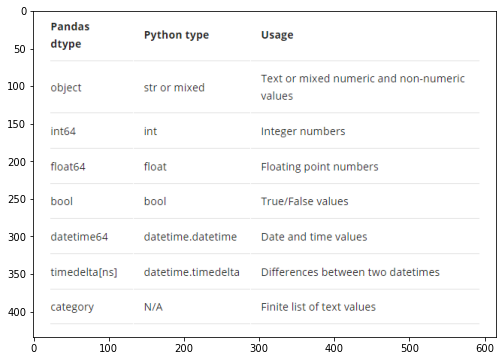

In [10]:
plt.figure(figsize=(20,6))
image = mpimg.imread("data_type.png")
plt.imshow(image)
plt.show()

Sometimes, we need to convert the data from one type to another.
For example, common conversions are as follows.

-- string <-> datetime

-- string <-> int/float

#### astype()

We can use the astype() method of DataFrame or Series to convert the data types of all columns (maybe fail) or specified columns.

##### Convert the data types of all the columns at once

In [11]:
df = pd.DataFrame({"col1": ["1","2","3"], "col2": ["4", "5", "6"]})
df

,col1,col2
0,1,4
1,2,5
2,3,6


In [12]:
df.dtypes

col1    object
col2    object
dtype: object

In [13]:
df.astype(int).dtypes

col1    int32
col2    int32
dtype: object

##### Convert multiple columns with data type specified for each one

We can specify a dictionary parameter to specify the data type for each column to be converted.

In [14]:
df.astype({"col1": int, "col2": float}).dtypes

col1      int32
col2    float64
dtype: object

##### Convert the data type of one column

In [15]:
df["col1"] = df["col1"].astype(int)
df.dtypes

col1     int32
col2    object
dtype: object

##### Error handling in conversion

When some values can’t be converted, an error will occur by default.

In [16]:
df = pd.DataFrame({"col1": ["1","2","3"], "col2": ["abc", "5", "6"]})
df

,col1,col2
0,1,abc
1,2,5
2,3,6


In [ ]:
df.astype(int).dtypes

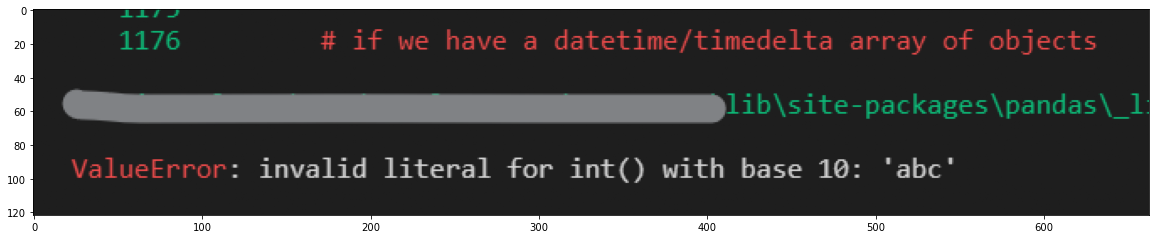

If we want to ignore the errors, we can specify the errors parameter to ‘ignore’.

In [18]:
df.astype(int, errors="ignore").dtypes

col1    object
col2    object
dtype: object

The conversion will be abandoned and data types remain unchanged.

In [22]:
df.astype(int, errors="ignore").dtypes

col1    object
col2    object
dtype: object

If we specify the data type for each column separately, the columns without errors will be converted successfully.

In [23]:
df.astype({"col1": int, "col2" : int},errors="ignore").dtypes

col1     int32
col2    object
dtype: object

### Pandas functions

There are some built-in functions in Pandas to perform the data type conversions.

##### pandas.to_numeric()

This function can convert a scalar value, a list, or a Series to a numeric type like float64 or int64 depending on the data.
We can also specify the target type by downcast parameter.

In [25]:
df = pd.DataFrame({"col1": ["1234", "889", "12567"]})
pd.to_numeric(df["col1"])

0     1234
1      889
2    12567
Name: col1, dtype: int64

If invalid values exist in the column, errors will occur by default as same as astype().
Of course, we can skip the errors by specifying errors=‘ignore’. We can also convert the invalid values to NaN by specifying errors=‘coerce’.

In [26]:
df = pd.DataFrame({"col1": ["abc", "889", "12567"]})
pd.to_numeric(df["col1"], errors='coerce')

0        NaN
1      889.0
2    12567.0
Name: col1, dtype: float64

#### pandas.to_datetime()

We can use the to_datetime() method of pandas to convert the columns with date-like strings to Timestamp type (date and time type in Pandas).

In [27]:
df = pd.DataFrame({"col1": ["abc", "889", "12567"], "col2": ["2022-1-1", "2022/2/1", "12/31/2022"]})
pd.to_datetime(df["col2"])

0   2022-01-01
1   2022-02-01
2   2022-12-31
Name: col2, dtype: datetime64[ns]

#### pandas.to_timedelta()

In [28]:
df = pd.DataFrame({"col1": ["2022-1-1", "2022/2/1", "12/31/2022"], "col2": ["1 days", "3 days", "-1 W"]})
pd.to_timedelta(df["col2"])

0    1 days
1    3 days
2   -7 days
Name: col2, dtype: timedelta64[ns]

We can use the converted result to do some date-related operations.
For example, we add the col2 (time difference) to col1.

In [29]:
pd.to_datetime(df["col1"]) + pd.to_timedelta(df["col2"])

0   2022-01-02
1   2022-02-04
2   2022-12-24
dtype: datetime64[ns]

#### pandas.DataFrame.convert_dtypes()

For example, we defined the types of all the columns when creating the DataFrame.

In [30]:
df = pd.DataFrame(
    {
        "a": pd.Series([1, 2, 3], dtype=np.dtype("int32")),
        "b": pd.Series(["x", "y", "z"], dtype=np.dtype("O")),
        "c": pd.Series([True, False, np.nan], dtype=np.dtype("O")),
        "d": pd.Series(["h", "i", np.nan], dtype=np.dtype("O")),
        "e": pd.Series([10, np.nan, 20], dtype=np.dtype("float")),
        "f": pd.Series([np.nan, 100.5, 200], dtype=np.dtype("float")),
    }
)
df.dtypes

a      int32
b     object
c     object
d     object
e    float64
f    float64
dtype: object

##### We can use the convert_dtypes() method to convert columns to the best possible dtypes.

In [31]:
df.convert_dtypes().dtypes

a      Int32
b     string
c    boolean
d     string
e      Int64
f    Float64
dtype: object

#### Convert columns type when reading data from files

We can convert the types of columns when reading data from files.
For example, when reading a CSV file we can convert column types as follows.

If we want to read all the columns as strings.

In [35]:
df = pd.read_csv("student_scores.csv", header=0, dtype=str)
df

,id,first_name,last_name,birth,gender,class,Subject,score
0,10001,John,Doe,2000-01-01,M,A,Calculus,63
1,10001,John,Doe,2000-01-01,M,A,Geometry,65
2,10001,John,Doe,2000-01-01,M,A,Statistics,63
3,10002,Jane,Smith,2000-01-02,F,B,Calculus,63
4,10002,Jane,Smith,2000-01-02,F,B,Geometry,64
5,10002,Jane,Smith,2000-01-02,F,B,Statistics,94
6,10003,Sarah,Thomas,2000-01-03,M,B,Calculus,96
7,10003,Sarah,Thomas,2000-01-03,M,B,Geometry,73
8,10003,Sarah,Thomas,2000-01-03,M,B,Statistics,61
9,10004,Frank,Brown,2000-01-04,M,A,Calculus,88


In [37]:
df.dtypes
# As you can see, all the column types are objects.

id            object
first_name    object
last_name     object
birth         object
gender        object
class         object
Subject       object
score         object
dtype: object

We can specify the target type for each column to be converted by dtype parameter.

In [41]:
df = pd.read_csv("student_scores.csv", header=0, dtype={"Subject": "category", "score": int})
df.dtypes

## As you can see, the Subject column and the score column are converted to category and integer type.

id               int64
first_name      object
last_name       object
birth           object
gender          object
class           object
Subject       category
score            int32
dtype: object

In [42]:
## You can also convert the date-like strings to date-time type data using parse_dates parameters.

df = pd.read_csv("student_scores.csv", header=0, parse_dates=["birth"])
print(df["birth"].iloc[0])
print(type(df["birth"].iloc[0]))

2000-01-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


 #### Custom functions

Sometimes, the columns with special formats cannot be converted by the built-in functions.

For example, suppose we have a DataFrame below.

The strings are numbers separated by commas.

In [43]:
df = pd.DataFrame({
    "amount": ["1,234", "567", "29,112,323"]
})
df

,amount
0,"1,234"
1,567
2,"29,112,323"


Error occured whether using astype() or pd.to_numeric() to convert the types.

In [ ]:
df["amount"].astype(int)

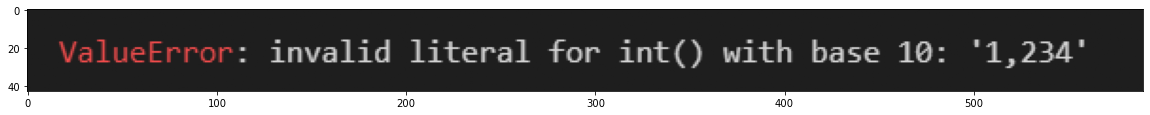

In [46]:
plt.figure(figsize=(20,6))
image = mpimg.imread("eror2.png")
plt.imshow(image)
plt.show()

In [ ]:
pd.to_numeric(df["amount"])

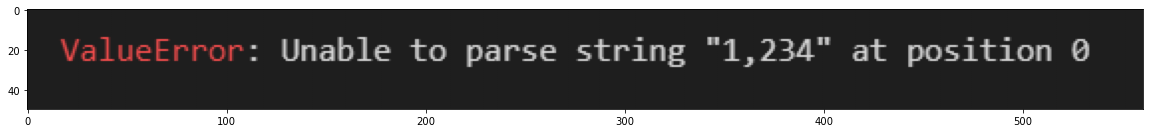

In [48]:
plt.figure(figsize=(20,6))
image = mpimg.imread("eror3.png")
plt.imshow(image)
plt.show()

In this case, we can use the custom functions to perform the type conversion.
Let’s use the apply() method of DataFrame to convert the amount column.

In [53]:
def conv_amount_to_num(row):
    """
    Convert the amount column separated by commas to integers.  
    :param row: a row of DataFrame  
    :return: converted integer  
    """
    if not pd.isnull(row["amount"]) and row["amount"]:
        str_without_comma = str(row["amount"]).replace(",","")
        return int(str_without_comma)
    else:
        # return 0 if null or empty
        return 0
         

Apply the conversion defined in the conv_amount_to_num function.

axis stands along which direction the function is applied.

0: apply function to each column.

1: apply function to each row. Here we want to convert the amount column of every row, so we need to set the axis to 1.

In [54]:
df.apply(conv_amount_to_num, axis=1)
# As you can see, all the values in the amount column are converted to integers.

0        1234
1         567
2    29112323
dtype: int64

You can use the result to override the original column or create a new column

In [55]:
df["amount"] = df.apply(conv_amount_to_num, axis=1)
# OR
df["amount_new"] = df.apply(conv_amount_to_num, axis=1)

###  Conclusion

We need to convert the types of columns to finish our data processing.

In this article, we talked about the conversion ways below.

astype() method of DataFrame or Series

Pandas built-in functions (to_numeric(), to_datetime(), to_timedelta(), convert_dtypes())

define custom functions to convert the columns that can’t be converted simply by the above ways